In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import spearmanr

In [70]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
# data_path = "../data_files/data.xlsx"
data_path = "../data_files/"


In [71]:
# import data into a pandas dataframe.
data = pd.read_excel(f'{data_path}data.xlsx', sheet_name="covariation")
data.head(3)
data2 = pd.read_excel(f'{data_path}data.xlsx', sheet_name="covariation2")

In [72]:
# summary = data.groupby('Locality').describe()
# summary
d34S = data.d34S
d18O = data.d18O
corg = data.d13C
cas_conc = data.CAS_conc
cas_conc_inv = 1/cas_conc
TIC = data.TIC
Mn = data.Mn
Mn_Sr = data.Mn_Sr
Mg_Ca = data.Mg/data.Ca

In [73]:
label_d13C = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
label_conc_inv = r'$1/[CAS]\;(ppm^{-1})$'
label_conc = r'$CAS\;(ppm)$'
label_Mg_Ca = 'Mg/Ca'
label_MnSr = 'Mn/Sr'
label_pyr = r'$\delta^{34}S_{pyr}\;(‰\;VCDT)$'
label_TIC = f'Carbonate content (%)'

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


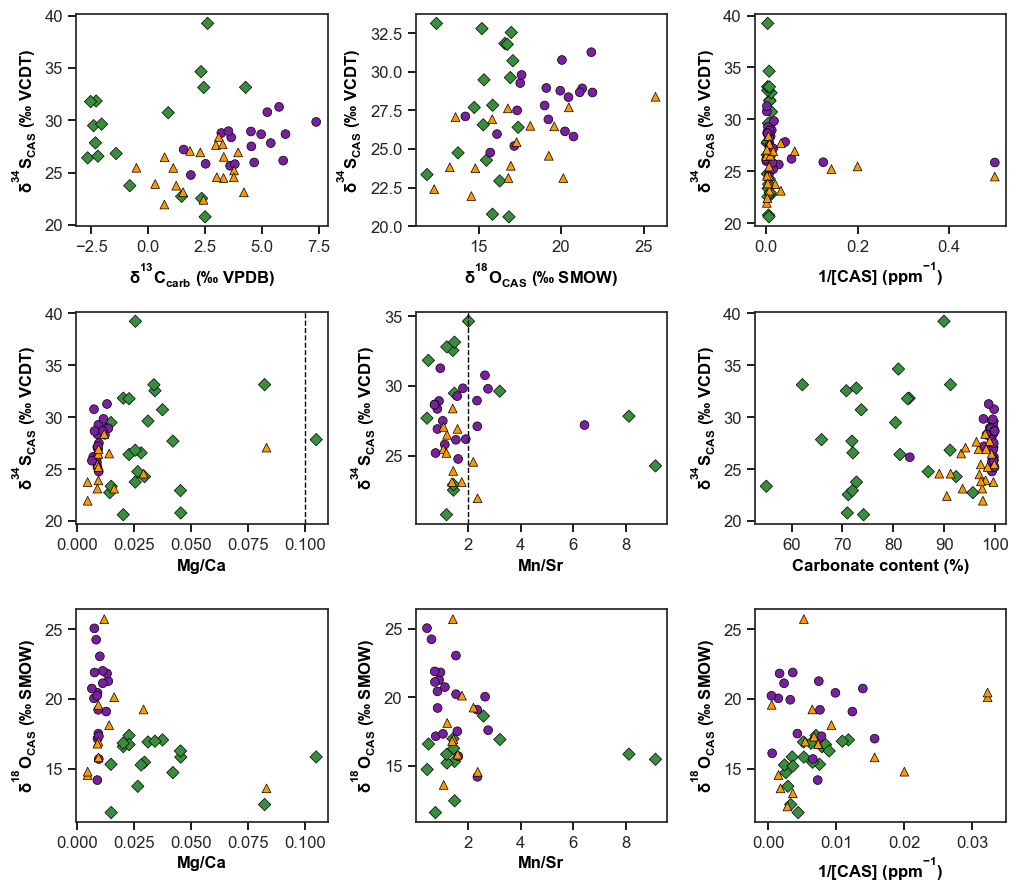

In [74]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(12, 10.5),  # constrained_layout=True,
                         ncols=3, nrows=3, sharey=False)
((ax0, ax1, ax2,), (ax3, ax4, ax5), (ax6, ax7, ax8)) = axes

fig.subplots_adjust(wspace=0.35, hspace = 0.4)

axes_ = [ax0,ax1,ax2,ax3, ax4, ax5, ax6, ax7, ax8]
y_axis = [d34S, d34S, d34S, d34S, d34S, d34S, d18O, d18O, d18O, ]
x_axis = [corg,d18O,cas_conc_inv, Mg_Ca, Mn_Sr, TIC, Mg_Ca, Mn_Sr, cas_conc_inv]
# colors = ["#563C5C", "#DE3163", "#B8860B"]
colors = ['#388E3C', '#7B1FA2', '#FF9800']
markers = ['D', 'o', '^']
x_label = [label_d13C, label_d18O, label_conc_inv, 
           label_Mg_Ca, label_MnSr, label_TIC, 
           label_Mg_Ca, label_MnSr, label_conc_inv]

y_label = [label_d34S, label_d34S, label_d34S,
           label_d34S, label_d34S, label_d34S, 
           label_d18O,label_d18O,label_d18O,]

for i in range(len(axes_)):
    sns.scatterplot(data=data, x= x_axis[i], y=y_axis[i], ax=axes_[i],
                    color='black', edgecolor='black', legend=False,
                        s=40, hue='Locality', palette=colors, alpha=1,
                        style='Locality', markers=markers,)
    axes_[i].tick_params(labelsize=12, color='black')
    axes_[i].set_xlabel(x_label[i], fontsize=12,
                      color='black', fontweight='bold')
    axes_[i].set_ylabel(y_label[i], fontsize=12,
                      color='black', fontweight='bold')
ax8.set_xlim(-0.002, 0.035)
ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')  
ax3.axvline(x=0.1, linewidth=1, color='black', linestyle='--')  
plt.savefig(f"{save_path}crossplots_no-outlier.pdf", dpi=600)


In [75]:
cas_conc_inv.idxmax() #checks the index of the row with the maximum value.
(Mn>300).sum(), Mn.count() # check the number of samples with Mn/Sr > 2, count how many samples have Mn/Sr values.

(33, 56)

In [76]:
# Group the data by locality
grouped = data2.groupby('Locality')

# Loop over the groups and calculate the correlation coefficient and p-value
for name, group in grouped:
    c_carb = group['d13C']
    d34S = group['d34S']
    cas_conc = 1/group['CAS_conc']
    d18O = group['d18O']
    MnSr = group["Mn_Sr"]

    Ccorr, Cp_value = spearmanr(c_carb, d34S, nan_policy='omit')
    Ocorr, Op_value = spearmanr(d18O, d34S, nan_policy='omit')
    O_CAScorr, O_CASp_value = spearmanr(d18O, cas_conc, nan_policy='omit')
    cas_corr, cas_p_value = spearmanr(cas_conc, d34S, nan_policy='omit')
    MnSr_corr, MnSr_p_value = spearmanr(d34S, MnSr, nan_policy='omit')
    Mnd13C_corr, Mnd13C_p_value = spearmanr(c_carb, MnSr, nan_policy='omit')

    print(f"Locality: {name} - d13C/d34S: {Ccorr:.2f}, p-value: {Cp_value:.2f}")
    print(f"Locality: {name} - d18O/d34S: {Ocorr:.2f}, p-value: {Op_value:.2f}")
    print(
        f"Locality: {name} - CAS_d18O: { O_CAScorr:.2f}, p-value: {O_CASp_value:.2f}")
    print(f"Locality: {name} - CAS/d34S: {cas_corr:.2f}, p-value: {cas_p_value:.2f}")
    print(
        f"Locality: {name} - MnSr/d34S: {MnSr_corr:.2f}, p-value: {MnSr_p_value:.2f}")
    print(
        f"Locality: {name} - d13C/MnSr: {Mnd13C_corr:.2f}, p-value: {Mnd13C_p_value:.2f}")


Locality: Jebel Aweri - d13C/d34S: 0.47, p-value: 0.05
Locality: Jebel Aweri - d18O/d34S: 0.42, p-value: 0.07
Locality: Jebel Aweri - CAS_d18O: -0.37, p-value: 0.15
Locality: Jebel Aweri - CAS/d34S: -0.58, p-value: 0.00
Locality: Jebel Aweri - MnSr/d34S: 0.17, p-value: 0.49
Locality: Jebel Aweri - d13C/MnSr: -0.23, p-value: 0.38
Locality: Qiakong - d13C/d34S: 0.18, p-value: 0.49
Locality: Qiakong - d18O/d34S: 0.06, p-value: 0.81
Locality: Qiakong - CAS_d18O: 0.72, p-value: 0.00
Locality: Qiakong - CAS/d34S: 0.02, p-value: 0.92
Locality: Qiakong - MnSr/d34S: 0.12, p-value: 0.69
Locality: Qiakong - d13C/MnSr: -0.21, p-value: 0.44
Locality: Wadi Musjah - d13C/d34S: 0.18, p-value: 0.45
Locality: Wadi Musjah - d18O/d34S: 0.44, p-value: 0.08
Locality: Wadi Musjah - CAS_d18O: 0.52, p-value: 0.05
Locality: Wadi Musjah - CAS/d34S: 0.19, p-value: 0.43
Locality: Wadi Musjah - MnSr/d34S: -0.54, p-value: 0.09
Locality: Wadi Musjah - d13C/MnSr: 0.21, p-value: 0.54


# Box plots

In [77]:
box = pd.read_excel(f'{data_path}lit_data.xlsx', sheet_name='combined')
box.head(3)

,Locality,Author,Stage,height,d34S,d13C,CAS,d34Spyr,d18Ocas,environment,Basin
0,Mineral Mountains,"Thomazo et al., 2019",Smithian,35.2,24.2,NaN,54.0,NaN,NaN,shallow marine,Sonoma foreland basin
1,Mineral Mountains,"Thomazo et al., 2019",Smithian,56,19.5,NaN,24.0,NaN,NaN,shallow marine,Sonoma foreland basin
2,Mineral Mountains,"Thomazo et al., 2019",Smithian,61.2,19.6,NaN,28.0,NaN,NaN,shallow marine,Sonoma foreland basin


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


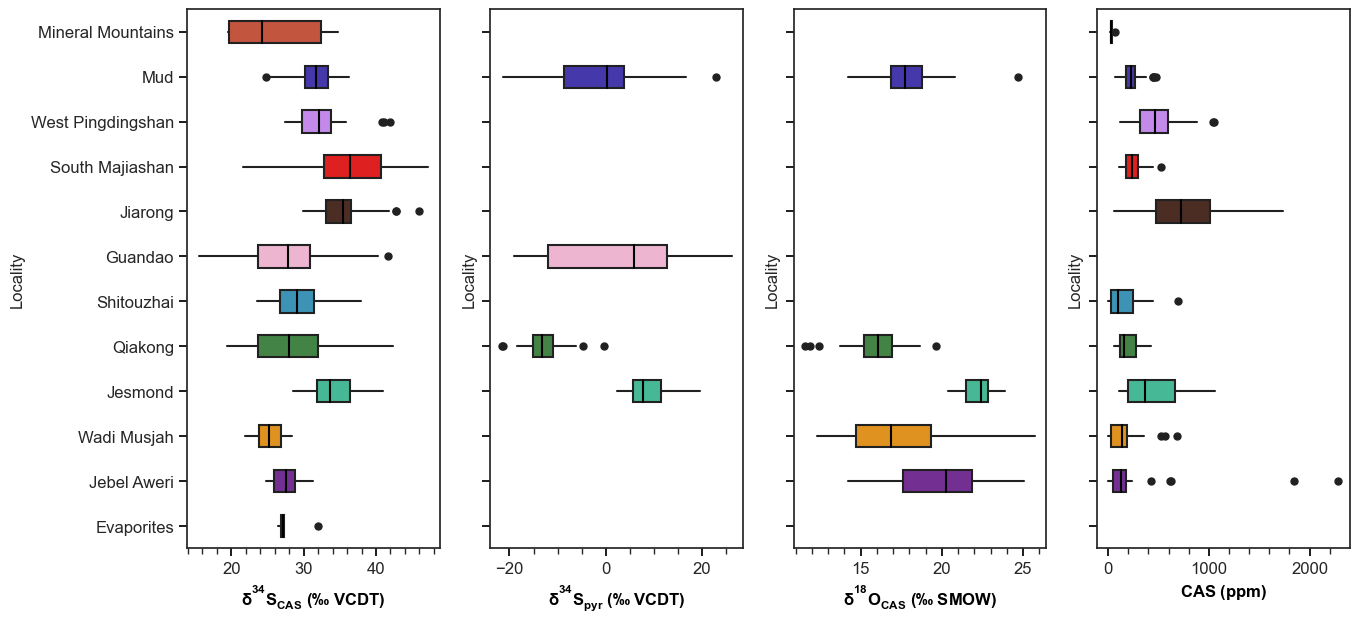

In [78]:
# Create figure landscape mode
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15, 7), sharey=True)
plot_axes = [ax0, ax1, ax2, ax3]
plot_data = ["d34S", "d34Spyr", "d18Ocas", "CAS"]
labels = [label_d34S, label_pyr, label_d18O,label_conc]
font_size = 12
palette = ["#d84727", "#3625be", "#C77AF9", "red", "#51291e", "#f7accf",
           "#289cc9", '#388E3C', '#33cb9c', '#FF9800', '#7B1FA2', '#e11ee1']

for i in range(len(plot_axes)):
    sns.boxplot(y='Locality', x=plot_data[i], data=box, ax=plot_axes[i],
                medianprops={"color": "black"}, flierprops={"marker": "o"},
                width=0.5, showcaps=False, palette = palette)
    plot_axes[i].set_xlabel(labels[i], size=font_size,
                            c="black", fontweight="bold")
    plot_axes[i].set_ylabel("Locality", size=font_size)
    plot_axes[i].tick_params(labelsize=font_size, color="black")
    plot_axes[i].minorticks_on()
    # Turn off x-axis minor ticks
    plot_axes[i].yaxis.set_tick_params(which='minor', left=False)

plt.savefig(f'{save_path}boxplots.pdf', dpi=600)


Calculate the seawater sulfate concentration using the rate method

In [79]:
# Given equation: x = 10^((log(y) - 1.1) / 0.42)

def calculate_x(y,level):
    if isinstance(level, int):
        return 'Please indicate "max, min or mean" as the second argument when calling the function'
    elif level == "min":
        a = 1.18
        b = 0.40
    elif level == "max":
        a = 1.02
        b = 0.44
    elif level == "mean":
        a = 1.10
        b = 0.42
    else:
        return None   
    result = 10**((np.log10(y)-a)/b)
    return result

# Example usage:
y = 34  # Substitute the desired value of y
x = calculate_x(y,'mean')
print(f"The calculated sulfate concentration is: {x:.1f} mM")
# print(f"The value of x is: {x}")


The calculated sulfate concentration is: 10.6 mM


In [80]:
value = [39.7,43.4,47.1]
value1 = [34.9,42.3,49.7]
level = ['min', 'mean', 'max']

for i in range(3):
    x = calculate_x(value[i], level[i])
    print(x.round(0))

11.0
19.0
30.0


In [81]:
# If Song et al. 2014 had used the MSR-trend method, they would have achieved 
# drastically different results for seawater sulfate as follows:
value = 32
results = []
for i in range(9):
    x = calculate_x(value, "mean")
    value+=1
    results.append(x)
results

[9.21812951163662,
 9.918860026709664,
 10.64953768890515,
 11.410505049532212,
 12.202098476818565,
 13.02464843959538,
 13.878479770503148,
 14.763911910707037,
 15.681259137870104]